In [37]:
import cmocean.cm as cm
import collections
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import netCDF4 as nc
import numpy as np

from salishsea_tools import viz_tools

%matplotlib inline

In [57]:
ymd = collections.OrderedDict()
ymd['21jan17'] = '20170121'
ymd['26jan17'] = '20170126'
ymd['31jan17'] = '20170131'
ymd['05feb17'] = '20170205'
ymd['10feb17'] = '20170210'
ymd['15feb17'] = '20170215'
ymd['20feb17'] = '20170220'
ymd['25feb17'] = '20170225'
ymd['01mar17'] = '20170301'
ymd['06mar17'] = '20170306'
ymd['11mar17'] = '20170311'
ymd['16mar17'] = '20170316'
ymd['21mar17'] = '20170321'
ymd['26mar17'] = '20170326'
ymd['31mar17'] = '20170331'
ymd['05apr17'] = '20170405'
ymd['10apr17'] = '20170410'
ymd['15apr17'] = '20170415'
ymd['20apr17'] = '20170420'
ymd['25apr17'] = '20170425'
ymd['30apr17'] = '20170430'
ymd['05may17'] = '20170505'
ymd['10may17'] = '20170510'
ymd['15may17'] = '20170515'
ymd['20may17'] = '20170520'
ymd['25may17'] = '20170525'
original = '/results/SalishSea/nowcast-green/'
new_hindcast = '/results/SalishSea/hindcast/'
basefilename = 'SalishSea_1d_'

In [20]:
ymd = collections.OrderedDict()
ymd['25aug15'] = '20150825'
ymd['01sep15'] = '20150901'
ymd['08sep15'] = '20150908'
ymd['15sep15'] = '20150915'
ymd['22sep15'] = '20150922'
ymd['29sep15'] = '20150929'
ymd['06oct15'] = '20151006'
original = '/results/SalishSea/nowcast-green/'
new_hindcast = '/results/SalishSea/hindcast/'
basefilename = 'SalishSea_1d_'

In [21]:
ymd = collections.OrderedDict()
ymd['31aug15'] = '20150831'
ymd['30sep15'] = '20150930'
ymd['31oct15'] = '20151031'
ymd['30nov15'] = '20151130'
ymd['31dec15'] = '20151231'
ymd['31jan16'] = '20160131'
ymd['29feb16'] = '20160229'
ymd['31mar16'] = '20160331'
ymd['30apr16'] = '20160430'
ymd['31may16'] = '20160531'
ymd['30jun16'] = '20160630'
ymd['31jul16'] = '20160731'
ymd['31aug16'] = '20160831'
ymd['30sep16'] = '20160930'
ymd['31oct16'] = '20161031'
ymd['30nov16'] = '20161130'
ymd['31dec16'] = '20161231'
ymd['31jan17'] = '20170131'
original = '/results/SalishSea/nowcast-green/'
new_hindcast = '/results/SalishSea/hindcast/'
basefilename = 'SalishSea_1d_'

/results/SalishSea/nowcast-green/21jan17/SalishSea_1d_20170121_20170121_grid_T.nc


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


0.266836827501
0.00601262948569
/results/SalishSea/nowcast-green/26jan17/SalishSea_1d_20170126_20170126_grid_T.nc
0.250101418351
0.00628749527948
/results/SalishSea/nowcast-green/31jan17/SalishSea_1d_20170131_20170131_grid_T.nc
0.243610852375
0.00653798167243
/results/SalishSea/nowcast-green/05feb17/SalishSea_1d_20170205_20170205_grid_T.nc
0.196748569392
0.00437156118991
/results/SalishSea/nowcast-green/10feb17/SalishSea_1d_20170210_20170210_grid_T.nc
0.170027485939
0.00365356393378
/results/SalishSea/nowcast-green/15feb17/SalishSea_1d_20170215_20170215_grid_T.nc
0.14147748356
0.00716610976467
/results/SalishSea/nowcast-green/20feb17/SalishSea_1d_20170220_20170220_grid_T.nc
0.164373275451
0.00849407006927
/results/SalishSea/nowcast-green/25feb17/SalishSea_1d_20170225_20170225_grid_T.nc
0.112466518987
0.00919485833656
/results/SalishSea/nowcast-green/01mar17/SalishSea_1d_20170301_20170301_grid_T.nc
0.113177990923
0.00872639141845
/results/SalishSea/nowcast-green/06mar17/SalishSea_1d_201

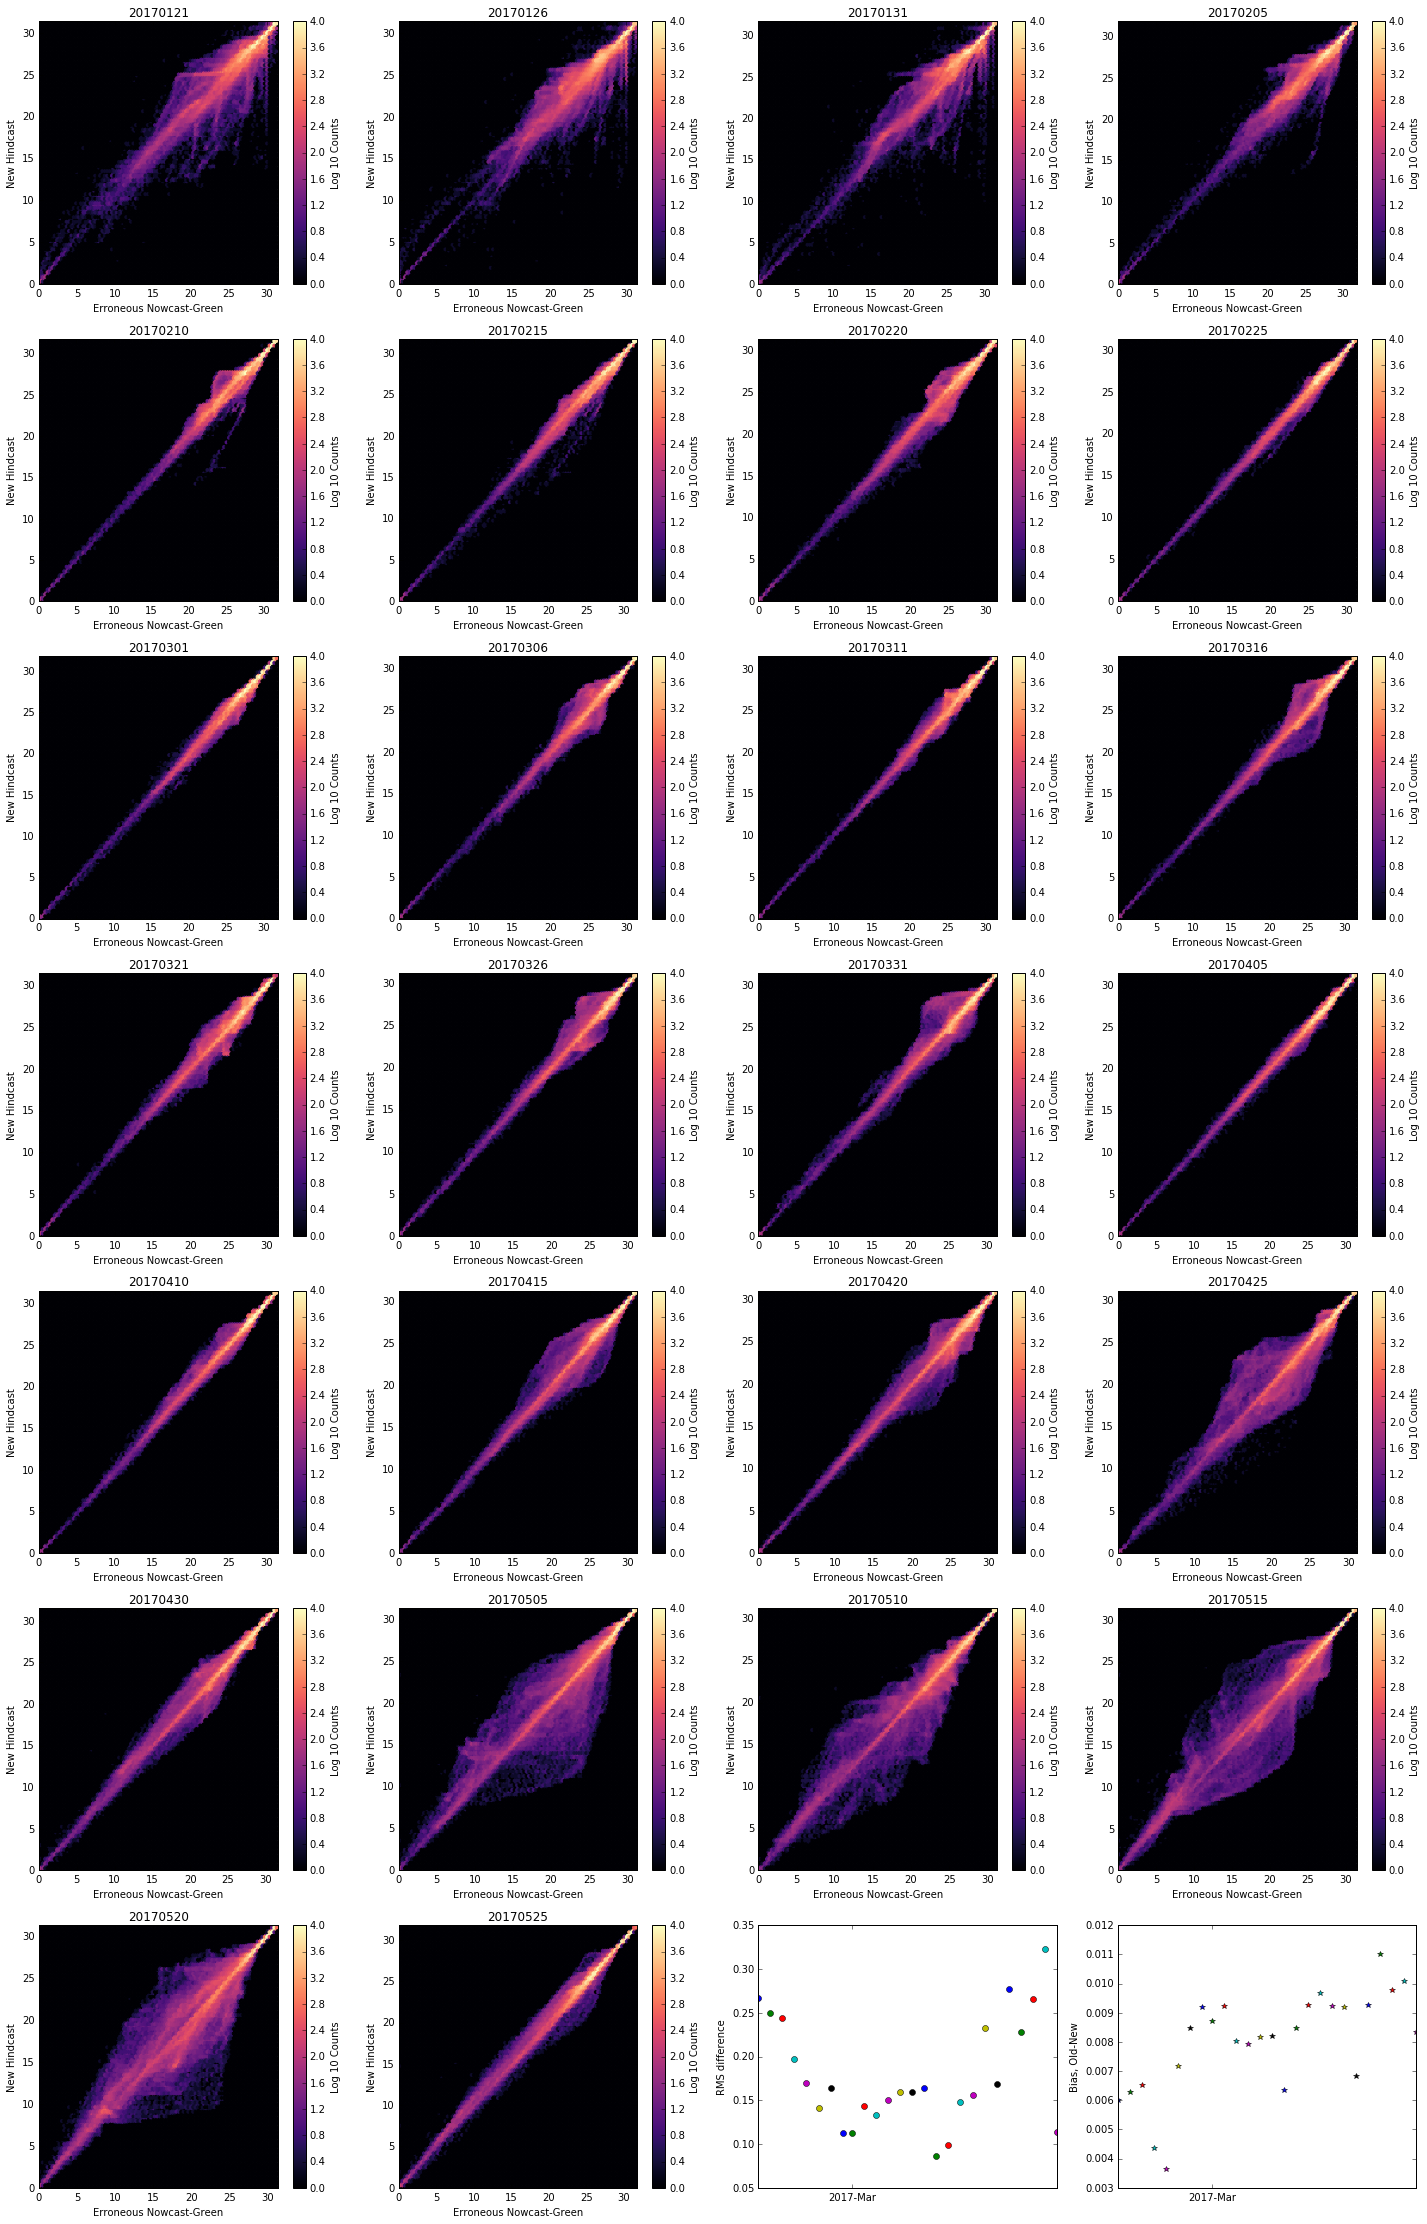

In [58]:
lastrow = 6
fig, axs = plt.subplots(lastrow+1, 4, figsize=(20, 31))
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%Y-%b')
count = 0
scount = 0
for date in ymd:
    filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[
        date] + '_grid_T.nc'
    print(filename)
    data_orig = nc.Dataset(filename)
    filename = new_hindcast + date + '/' + basefilename + ymd[
        date] + '_' + ymd[date] + '_grid_T.nc'
    data_new = nc.Dataset(filename)
    S1 = data_orig['vosaline'][0]
    S2 = data_new['vosaline'][0]
    k0 = 0
    k1 = 5
    mesh = axs[scount, count].hexbin(np.ndarray.flatten(S1[k0:k1]), np.ndarray.flatten(S2[k0:k1]), bins='log', 
                                     cmap='magma', vmax=4)
    cb = fig.colorbar(mesh, ax=axs[scount, count])
    cb.set_label('Log 10 Counts')
    axs[scount, count].set_title(ymd[date])
    axs[scount, count].set_xlabel('Erroneous Nowcast-Green')
    axs[scount, count].set_ylabel('New Hindcast')
    if count < 3:
        count = count + 1
    else:
        scount = scount + 1
        count = 0
    
    dt = datetime.datetime.strptime(ymd[date], '%Y%m%d')
    rms = np.sqrt(np.mean((S1-S2)**2))
    print(rms)
    axs[lastrow, 2].plot(dt, rms, 'o')
    axs[lastrow, 2].xaxis.set_major_locator(months)
    axs[lastrow, 2].xaxis.set_major_formatter(monthsFmt)
    axs[lastrow, 2].set_ylabel('RMS difference')
    axs[lastrow, 3].set_ylabel('Bias, Old-New')
    bias = np.mean(S1)-np.mean(S2)
    print(bias)
    axs[lastrow, 3].plot(dt, bias, '*')
    axs[lastrow, 3].xaxis.set_major_locator(months)
    axs[lastrow, 3].xaxis.set_major_formatter(monthsFmt)
plt.tight_layout()

# New Hindcast Versus Old Hindcast: Top 5 depths

## May 25, 2017

In [59]:
date = '25may17'
filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
print(filename)
data_orig = nc.Dataset(filename)
filename = new_hindcast + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
data_new = nc.Dataset(filename)
S1 = data_orig['vosaline'][0]
S2 = data_new['vosaline'][0]
S1m = np.ma.masked_array(S1, 1-tmask)
S2m = np.ma.masked_array(S2, 1-tmask)

/results/SalishSea/nowcast-green/25may17/SalishSea_1d_20170525_20170525_grid_T.nc


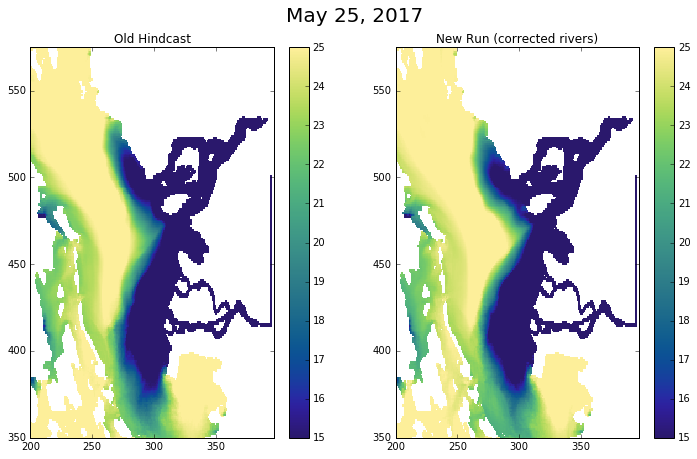

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmin, vmax = 15, 25
mesh = axs[0].pcolormesh(S1m[0] ,cmap=cm.haline, vmax=vmax, vmin = vmin)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
axs[0].set_title('Old Hindcast')
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(S2m[0] ,cmap=cm.haline, vmax=vmax, vmin=vmin)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
axs[1].set_title('New Run (corrected rivers)')
fig.colorbar(mesh, ax=axs[1])
fig.suptitle('May 25, 2017', fontsize=20)

## May 20, 2017

In [61]:
date = '20may17'
filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
print(filename)
data_orig = nc.Dataset(filename)
filename = new_hindcast + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
data_new = nc.Dataset(filename)
S1 = data_orig['vosaline'][0]
S2 = data_new['vosaline'][0]
S1m = np.ma.masked_array(S1, 1-tmask)
S2m = np.ma.masked_array(S2, 1-tmask)

/results/SalishSea/nowcast-green/20may17/SalishSea_1d_20170520_20170520_grid_T.nc


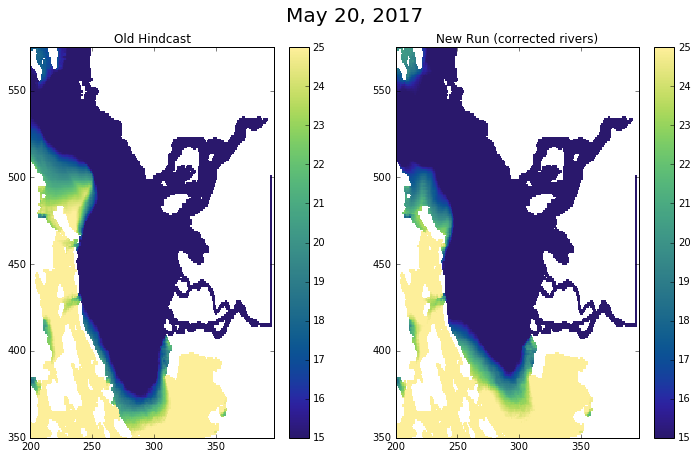

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmin, vmax = 15, 25
mesh = axs[0].pcolormesh(S1m[0] ,cmap=cm.haline, vmax=vmax, vmin = vmin)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
axs[0].set_title('Old Hindcast')
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(S2m[0] ,cmap=cm.haline, vmax=vmax, vmin=vmin)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
axs[1].set_title('New Run (corrected rivers)')
fig.colorbar(mesh, ax=axs[1])
fig.suptitle('May 20, 2017', fontsize=20)

## May 5, 2017

In [55]:
date = '05may17'
filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
print(filename)
data_orig = nc.Dataset(filename)
filename = new_hindcast + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
data_new = nc.Dataset(filename)
S1 = data_orig['vosaline'][0]
S2 = data_new['vosaline'][0]
S1m = np.ma.masked_array(S1, 1-tmask)
S2m = np.ma.masked_array(S2, 1-tmask)

/results/SalishSea/nowcast-green/05may17/SalishSea_1d_20170505_20170505_grid_T.nc


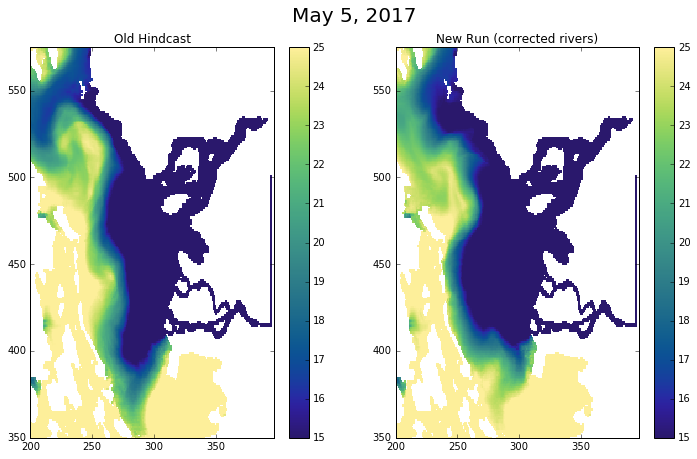

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmin, vmax = 15, 25
mesh = axs[0].pcolormesh(S1m[0] ,cmap=cm.haline, vmax=vmax, vmin = vmin)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
axs[0].set_title('Old Hindcast')
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(S2m[0] ,cmap=cm.haline, vmax=vmax, vmin=vmin)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
axs[1].set_title('New Run (corrected rivers)')
fig.colorbar(mesh, ax=axs[1])
fig.suptitle('May 5, 2017', fontsize=20)

## Look at Surface Salinity on April 25 during high divergence

In [43]:
tmask = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc').variables['tmask'][0]
S1m = np.ma.masked_array(S1, 1-tmask)
S2m = np.ma.masked_array(S2, 1-tmask)

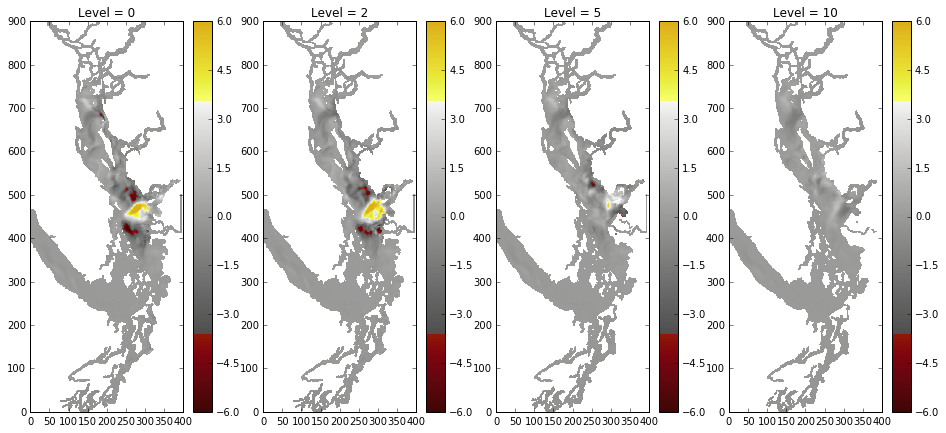

In [44]:
fig, axs = plt.subplots(1, 4, figsize=(16,7))
for iax, level in enumerate([0, 2, 5, 10]):
    mesh = axs[iax].pcolormesh(S2m[level]-S1m[level], cmap=cm.oxy, vmax=6, vmin=-6)
    viz_tools.set_aspect(axs[iax])
    fig.colorbar(mesh, ax=axs[iax])
    axs[iax].set_title('Level = '+str(level))

25 april 17 is coming out of Neap Tides.  
Winds moderate, about 5 m/s  
River discharge 2400 m3/s and not changing quickly.

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


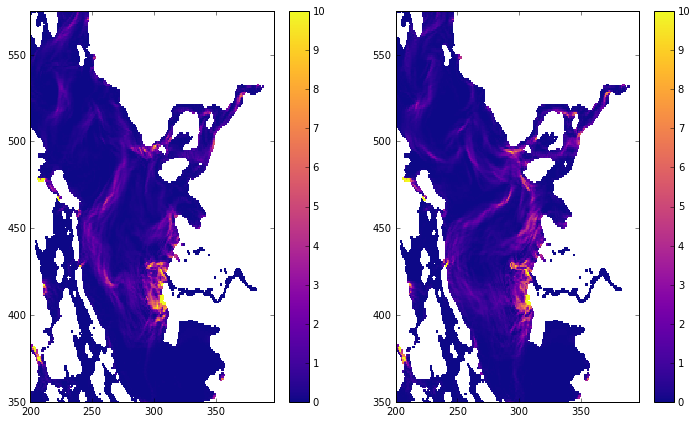

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmax=10
mesh = axs[0].pcolormesh((S1m[0, 2:, 1:-1] - S1m[0, 0:-2, 1:-1])**2 + (S1m[0, 1:-1, 2:] - S1m[0, 1:-1, 0:-2])**2 ,cmap='plasma', vmax=vmax)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh((S2m[0, 2:, 1:-1] - S2m[0, 0:-2, 1:-1])**2 + (S2m[0, 1:-1, 2:] - S2m[0, 1:-1, 0:-2])**2 ,cmap='plasma', vmax=vmax)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
fig.colorbar(mesh, ax=axs[1])

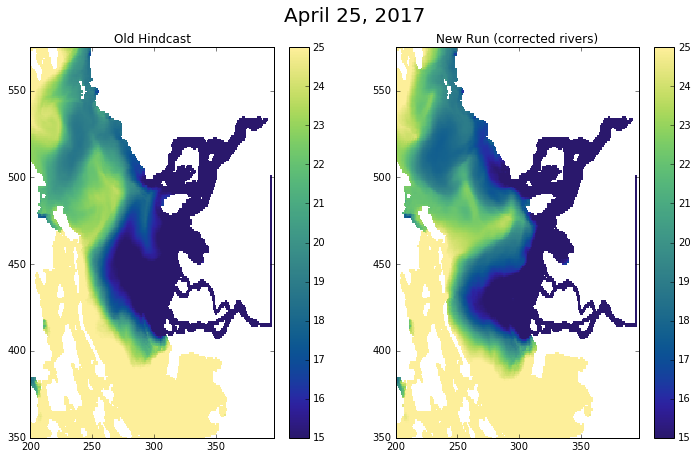

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmin, vmax = 15, 25
mesh = axs[0].pcolormesh(S1m[0] ,cmap=cm.haline, vmax=vmax, vmin = vmin)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
axs[0].set_title('Old Hindcast')
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(S2m[0] ,cmap=cm.haline, vmax=vmax, vmin=vmin)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
axs[1].set_title('New Run (corrected rivers)')
fig.colorbar(mesh, ax=axs[1])
fig.suptitle('April 25, 2017', fontsize=20)

WOW

## April 5, 2017

In [51]:
date = '05apr17'
filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
print(filename)
data_orig = nc.Dataset(filename)
filename = new_hindcast + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
data_new = nc.Dataset(filename)
S1 = data_orig['vosaline'][0]
S2 = data_new['vosaline'][0]
S1m = np.ma.masked_array(S1, 1-tmask)
S2m = np.ma.masked_array(S2, 1-tmask)

/results/SalishSea/nowcast-green/05apr17/SalishSea_1d_20170405_20170405_grid_T.nc


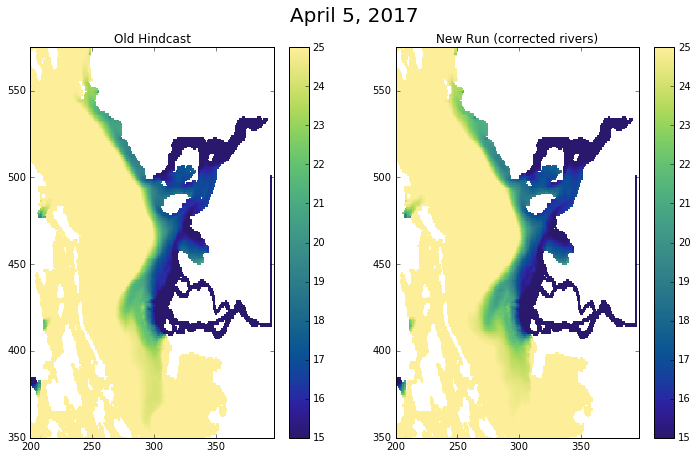

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmin, vmax = 15, 25
mesh = axs[0].pcolormesh(S1m[0] ,cmap=cm.haline, vmax=vmax, vmin = vmin)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
axs[0].set_title('Old Hindcast')
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(S2m[0] ,cmap=cm.haline, vmax=vmax, vmin=vmin)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
axs[1].set_title('New Run (corrected rivers)')
fig.colorbar(mesh, ax=axs[1])
fig.suptitle('April 5, 2017', fontsize=20)

## March 31

In [47]:
date = '31mar17'
filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
print(filename)
data_orig = nc.Dataset(filename)
filename = new_hindcast + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
data_new = nc.Dataset(filename)
S1 = data_orig['vosaline'][0]
S2 = data_new['vosaline'][0]
S1m = np.ma.masked_array(S1, 1-tmask)
S2m = np.ma.masked_array(S2, 1-tmask)

/results/SalishSea/nowcast-green/31mar17/SalishSea_1d_20170331_20170331_grid_T.nc


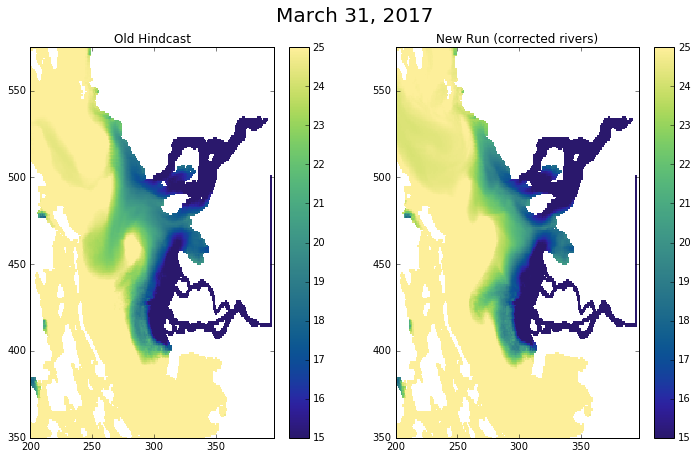

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmin, vmax = 15, 25
mesh = axs[0].pcolormesh(S1m[0] ,cmap=cm.haline, vmax=vmax, vmin = vmin)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
axs[0].set_title('Old Hindcast')
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(S2m[0] ,cmap=cm.haline, vmax=vmax, vmin=vmin)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
axs[1].set_title('New Run (corrected rivers)')
fig.colorbar(mesh, ax=axs[1])
fig.suptitle('March 31, 2017', fontsize=20)

## April 15, 2017

In [49]:
date = '15apr17'
filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
print(filename)
data_orig = nc.Dataset(filename)
filename = new_hindcast + date + '/' + basefilename + ymd[date] + '_' + ymd[date] + '_grid_T.nc'
data_new = nc.Dataset(filename)
S1 = data_orig['vosaline'][0]
S2 = data_new['vosaline'][0]
S1m = np.ma.masked_array(S1, 1-tmask)
S2m = np.ma.masked_array(S2, 1-tmask)

/results/SalishSea/nowcast-green/15apr17/SalishSea_1d_20170415_20170415_grid_T.nc


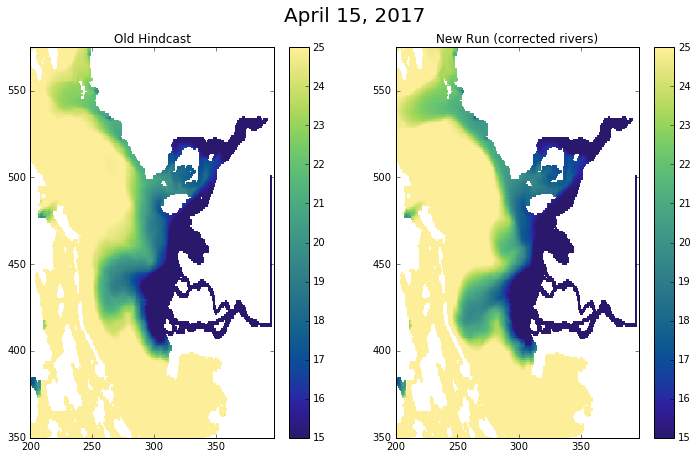

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
imin, imax= 350, 575; jmin, jmax=200, 397
vmin, vmax = 15, 25
mesh = axs[0].pcolormesh(S1m[0] ,cmap=cm.haline, vmax=vmax, vmin = vmin)
axs[0].set_xlim((jmin, jmax))
axs[0].set_ylim((imin, imax))
axs[0].set_title('Old Hindcast')
fig.colorbar(mesh, ax=axs[0])
mesh = axs[1].pcolormesh(S2m[0] ,cmap=cm.haline, vmax=vmax, vmin=vmin)
axs[1].set_xlim((jmin, jmax))
axs[1].set_ylim((imin, imax))
axs[1].set_title('New Run (corrected rivers)')
fig.colorbar(mesh, ax=axs[1])
fig.suptitle('April 15, 2017', fontsize=20)